# Ted Talks: What makes talks popular? EDA

## Exploratory Data Analysis

In [2]:
# Loading data
import numpy as np
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv("ted_main.csv")
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [4]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [5]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [6]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,24-02-2006,26-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,23-02-2006,26-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,25-02-2006,26-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,21-02-2006,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [8]:
df[['event']]

,event
0,TED2006
1,TED2006
2,TED2006
3,TED2006
4,TED2006
...,...
2545,TED2017
2546,TED2017
2547,TED2017
2548,TEDxMileHigh


In [9]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,24-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,25-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,16-09-2009
837,The power of vulnerability,Brené Brown,31168150,05-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,05-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,09-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,26-02-2008
5,Why we do what we do,Tony Robbins,20685401,01-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,07-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,26-10-2012


<AxesSubplot:xlabel='abbr', ylabel='views'>

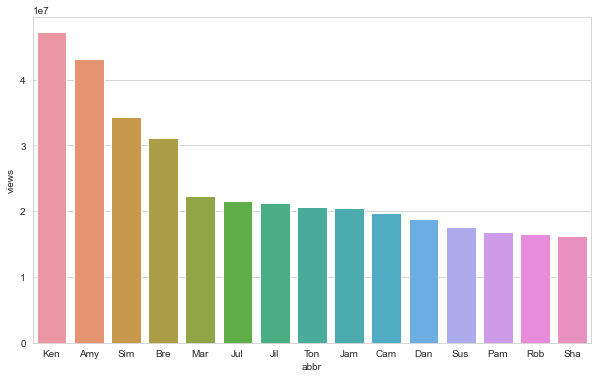

In [10]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

In [11]:
df[['views', 'comments']].describe()

,views,comments
count,2.550000e+03,2550.000000
mean,1.698297e+06,191.562353
std,2.498479e+06,282.315223
min,5.044300e+04,2.000000
25%,7.557928e+05,63.000000
50%,1.124524e+06,118.000000
75%,1.700760e+06,221.750000
max,4.722711e+07,6404.000000


# The average number of views on TED Talks in 1.6 million, 

# The median number of views is 1.12 million. 



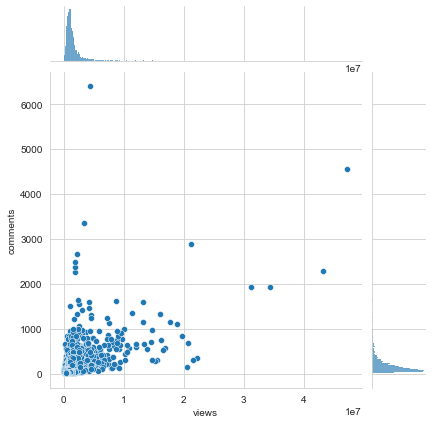

In [12]:
sns.jointplot(x='views', y='comments', data=df)

In [13]:
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


10 most commented TED Talks of all time.

# 10 most commented TED Talks of all time.

In [14]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)


,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


## Ken Robinson has second most comment video

## The title of the topics are more contravertial in general

# Ted Talk Popular Months and Days

In [15]:
df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

<AxesSubplot:xlabel='month', ylabel='talks'>

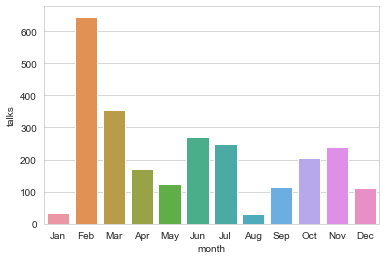

In [16]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

## February is clearly the most popular month for TED Conferences as 
## The official TED Conferences are held in February.

# TED Speakers

In [17]:
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


## Hans Rosling has the highest number of appearences: 9   !

# Which Occupation is invited to Speak the most at TED Talks?

In [18]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

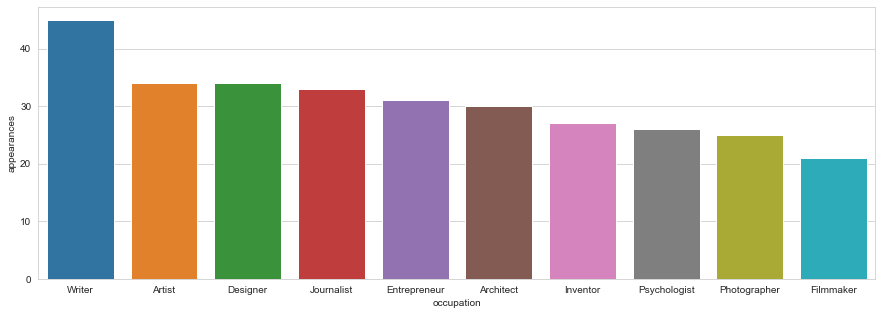

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()

## Writer is the most invited Occupation with 45 writers appearing.

## Followed by Artist and Designer with 33 appearances. 

# Which Occupation draws more views?

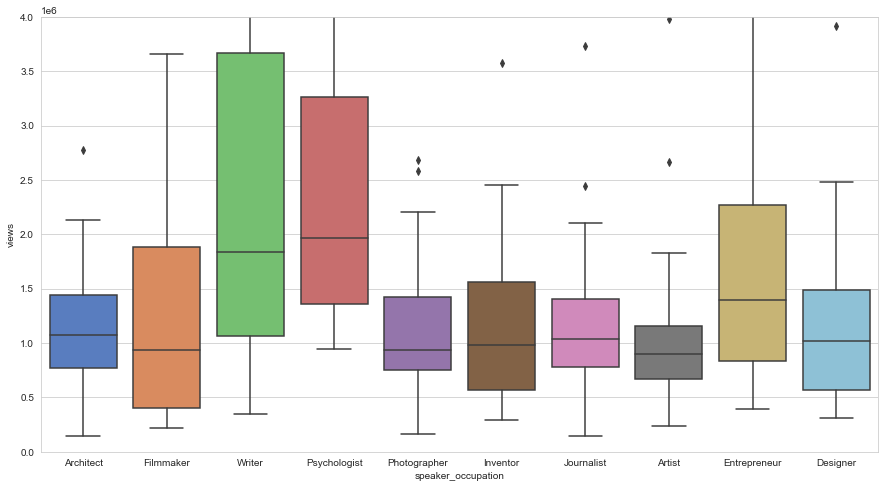

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()

## The Occupation Writer and Psychologist draws the most views! With hightest Medians.

In [21]:
# Look at the data a little. Look at events

In [22]:
event_df = pd.DataFrame(df['event'].value_counts()).reset_index()
event_df

,index,event
0,TED2014,84
1,TED2009,83
2,TED2016,77
3,TED2013,77
4,TED2015,75
...,...,...
350,TEDxIslay,1
351,TEDxSonomaCounty,1
352,TEDxWinnipeg,1
353,TEDxOrangeCoast,1


In [23]:
event_df.columns = ['event', 'talks']
event_df

,event,talks
0,TED2014,84
1,TED2009,83
2,TED2016,77
3,TED2013,77
4,TED2015,75
...,...,...
350,TEDxIslay,1
351,TEDxSonomaCounty,1
352,TEDxWinnipeg,1
353,TEDxOrangeCoast,1


<AxesSubplot:xlabel='event', ylabel='talks'>

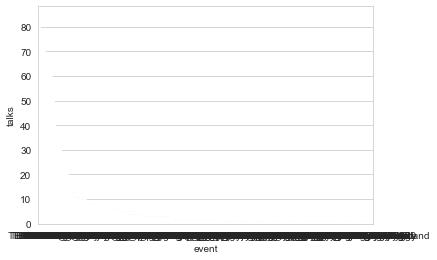

In [24]:
#sns.barplot(x='event', y='talks', data=event_df)

# Among 2550 talks in the dataset, some are in fact not TED or TEDx events (for example, there is a video filmed in 1972, even before TED is established). They will be removed in this study

In [25]:
ted = pd.read_csv('ted_main.csv')

In [26]:
# Categorize events into TED and TEDx; exclude those that are non-TED events
ted = ted[ted['event'].str[0:3]=='TED'].reset_index()
ted

,index,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2435,2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2436,2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2437,2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes u

In [27]:
ted.head(50)

,index,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,1153181460,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,9,900,"Pastor Rick Warren, author of ""

In [28]:
ted.loc[:,'event_cat'] = ted['event'].apply(lambda x: 'TEDx' if x[0:4]=='TEDx' else 'TED')

ted

,index,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,event_cat
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,TED
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,TED
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,TED
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,TED
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,TED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,TED
2435,2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,TED
2436,2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,TED
2437,2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'U

In [29]:
print ("No. of talks remain: ", len(ted))

No. of talks remain:  2439


In [31]:
df.shape

(2550, 18)

In [32]:
len(df)

2550

In [33]:
len(df) - len(ted)

111

In [34]:
print("Number of non-Ted talks that we removed were:", len(df) - len(ted))

Number of non-Ted talks that we removed were: 111


# TRAINING AND TEST SETS.

In [35]:
ted.head()

,index,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,event_cat
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,TED
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,TED
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,TED
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,TED
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,TED


In [36]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,month
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Feb
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,24-02-2006,26-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,Feb
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,23-02-2006,26-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,Feb
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,25-02-2006,26-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,Feb
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,21-02-2006,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,Feb


In [38]:
# Look at views and comments only at the moment.

In [39]:
df_comments = df['comments']

In [40]:
df_views = df['views']

In [41]:
df_comments

0       4553
1        265
2        124
3        200
4        593
        ... 
2545      17
2546       6
2547      10
2548      32
2549       8
Name: comments, Length: 2550, dtype: int64

In [42]:
df_views

0       47227110
1        3200520
2        1636292
3        1697550
4       12005869
          ...   
2545      450430
2546      417470
2547      375647
2548      419309
2549      391721
Name: views, Length: 2550, dtype: int64

In [43]:
# scatter plot between the two variablesabs

In [44]:
from matplotlib import pyplot

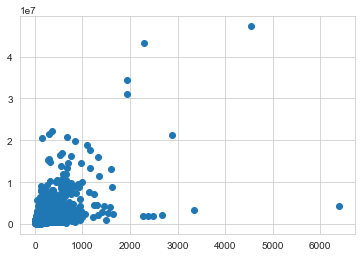

In [45]:
pyplot.scatter(df_comments, df_views)
pyplot.show()

In [46]:
from scipy.stats import pearsonr

In [47]:
corr, _ = pearsonr(df_comments, df_views)

In [48]:
corr # As can be seen, not much of a correlation between the two.

0.5309387006213678

In [49]:
# if we include all the talks will the correlation between comments and views increase or decrease?

corr, _ = pearsonr(ted['comments'], ted['views'])
corr

0.5289031736657247

In [50]:
# it decreases! 

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_comments, df_views, test_size=0.2, random_state=1)
    
    
# (x_train, y_train), (x_test, y_test)
# X_train, X_val, y_train, y_val 
#    = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [53]:
for set in [X_train, X_test, y_train, y_test]:
    print( len(set))

2040
510
2040
510


In [55]:
#set_sizes = [X_train, X_test, y_train, y_test].apply(lambda x: len(x)) # The above loop works
#set_sizes

## Building a neural network to predict views

In [1]:
#Import required packages
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

### Simple neural network

In [57]:
# comments as input and views as output.

In [115]:
# Specify the modelmodel = Sequential()
model_1_neuron = Sequential()
model_1_neuron.add(Dense(1, input_dim = 1, activation = "relu"))
model_1_neuron.compile(loss='mse', optimizer='adam',
metrics=['mse'])

In [116]:
# Fit the model, or in other words, train the model. 

#Train the model and make predictions
model_1_neuron.fit(X_train, y_train, epochs=100 ,batch_size=32)
#Make predictions from the trained model
predictions = model_1_neuron.predict(X_test)

Epoch 1/100
64/64 [==============================] - 3s 570us/step - loss: 8819963524143.2617 - mse: 8819963524143.2617
Epoch 2/100
64/64 [==============================] - 0s 602us/step - loss: 8567132080852.6768 - mse: 8567132080852.6768
Epoch 3/100
64/64 [==============================] - 0s 633us/step - loss: 8078301315324.0615 - mse: 8078301315324.0615
Epoch 4/100
64/64 [==============================] - 0s 617us/step - loss: 7535354336933.4150 - mse: 7535354336933.4150
Epoch 5/100
64/64 [==============================] - 0s 649us/step - loss: 8231896610847.5078 - mse: 8231896610847.5078
Epoch 6/100
64/64 [==============================] - 0s 633us/step - loss: 12405127487866.0918 - mse: 12405127487866.0918
Epoch 7/100
64/64 [==============================] - 0s 586us/step - loss: 9625897706858.3379 - mse: 9625897706858.3379
Epoch 8/100
64/64 [==============================] - 0s 586us/step - loss: 9590641266624.9844 - mse: 9590641266624.9844
Epoch 9/100
64/64 [===================

In [121]:
y_test #predictions

81       560904
107      870412
1576     780039
2266     645572
645      320717
         ...   
920     1021180
370      774492
612      433879
2479    1088768
1901     976621
Name: views, Length: 510, dtype: int64

In [122]:
predictions - y_test

ValueError: Data must be 1-dimensional

In [67]:
# Specify the modelmodel = Sequential()
model_5_neuron = Sequential()
model_5_neuron.add(Dense(5, input_dim = 1, activation = "relu")) #Input layer, Why is number of neurons and input_dim different things
model_5_neuron.add(Dense(3,activation = "relu")) # Hidden layer
model_5_neuron.add(Dense(1,activation = "relu")) # Output layer
model_5_neuron.compile(loss='mse', optimizer='adam',
metrics=['mse'])

# Fit the model, or in other words, train the model. 

#Train the model and make predictions
model_5_neuron.fit(X_train, y_train, epochs=100 ,batch_size=32)
#Make predictions from the trained model
predictions = model_5_neuron.predict(X_test)

Epoch 1/100
64/64 [==============================] - 1s 1ms/step - loss: 9104138924599.1387 - mse: 9104138924599.1387
Epoch 2/100
64/64 [==============================] - 0s 2ms/step - loss: 8800026230784.0000 - mse: 8800026230784.0000
Epoch 3/100
64/64 [==============================] - 0s 1ms/step - loss: 7893455926319.2617 - mse: 7893455926319.2617
Epoch 4/100
64/64 [==============================] - 0s 1ms/step - loss: 10005773956899.4453 - mse: 10005773956899.4453
Epoch 5/100
64/64 [==============================] - 0s 1ms/step - loss: 7545458750007.1387 - mse: 7545458750007.1387
Epoch 6/100
64/64 [==============================] - 0s 1ms/step - loss: 7576765688406.6465 - mse: 7576765688406.6465
Epoch 7/100
64/64 [==============================] - 0s 1ms/step - loss: 8633835823482.0928 - mse: 8633835823482.0928
Epoch 8/100
64/64 [==============================] - 0s 1ms/step - loss: 8685270555285.6611 - mse: 8685270555285.6611
Epoch 9/100
64/64 [==============================] - 0

In [68]:
predictions

array([[  38741.133],
       [  96386.36 ],
       [  75721.086],
       [  39828.777],
       [  84422.25 ],
       [ 101824.59 ],
       [ 646735.2  ],
       [ 188836.27 ],
       [ 184485.69 ],
       [  50705.24 ],
       [ 460747.78 ],
       [  77896.375],
       [  78984.03 ],
       [ 229079.17 ],
       [ 137716.9  ],
       [  69195.21 ],
       [ 214939.77 ],
       [ 255182.67 ],
       [ 196449.8  ],
       [ 127928.09 ],
       [ 691328.6  ],
       [  76808.734],
       [  12637.629],
       [  39828.777],
       [  96386.36 ],
       [ 268234.4  ],
       [ 340019.03 ],
       [1001307.7  ],
       [  14812.92 ],
       [ 101824.59 ],
       [  60494.043],
       [  80071.68 ],
       [ 370473.12 ],
       [ 319353.78 ],
       [ 101824.59 ],
       [  94211.07 ],
       [ 129015.75 ],
       [ 223640.94 ],
       [  49617.59 ],
       [  49617.59 ],
       [  80071.67 ],
       [ 165995.72 ],
       [  77896.375],
       [  72458.15 ],
       [ 154031.61 ],
       [  

In [69]:
predictions[0:10]

array([[ 38741.133],
       [ 96386.36 ],
       [ 75721.086],
       [ 39828.777],
       [ 84422.25 ],
       [101824.59 ],
       [646735.2  ],
       [188836.27 ],
       [184485.69 ],
       [ 50705.24 ]], dtype=float32)

In [70]:
y_test[0:10]

81        560904
107       870412
1576      780039
2266      645572
645       320717
1225      655406
4       12005869
304       385647
579       415223
2355     1345520
Name: views, dtype: int64

In [73]:
np.arry(predictions[0:10]) - np.array(y_test[0:10])

AttributeError: module 'numpy' has no attribute 'arry'

In [79]:
type(predictions)

numpy.ndarray

In [81]:
predictions

array([[  38741.133],
       [  96386.36 ],
       [  75721.086],
       [  39828.777],
       [  84422.25 ],
       [ 101824.59 ],
       [ 646735.2  ],
       [ 188836.27 ],
       [ 184485.69 ],
       [  50705.24 ],
       [ 460747.78 ],
       [  77896.375],
       [  78984.03 ],
       [ 229079.17 ],
       [ 137716.9  ],
       [  69195.21 ],
       [ 214939.77 ],
       [ 255182.67 ],
       [ 196449.8  ],
       [ 127928.09 ],
       [ 691328.6  ],
       [  76808.734],
       [  12637.629],
       [  39828.777],
       [  96386.36 ],
       [ 268234.4  ],
       [ 340019.03 ],
       [1001307.7  ],
       [  14812.92 ],
       [ 101824.59 ],
       [  60494.043],
       [  80071.68 ],
       [ 370473.12 ],
       [ 319353.78 ],
       [ 101824.59 ],
       [  94211.07 ],
       [ 129015.75 ],
       [ 223640.94 ],
       [  49617.59 ],
       [  49617.59 ],
       [  80071.67 ],
       [ 165995.72 ],
       [  77896.375],
       [  72458.15 ],
       [ 154031.61 ],
       [  

In [82]:
np.array(predictions)

array([[  38741.133],
       [  96386.36 ],
       [  75721.086],
       [  39828.777],
       [  84422.25 ],
       [ 101824.59 ],
       [ 646735.2  ],
       [ 188836.27 ],
       [ 184485.69 ],
       [  50705.24 ],
       [ 460747.78 ],
       [  77896.375],
       [  78984.03 ],
       [ 229079.17 ],
       [ 137716.9  ],
       [  69195.21 ],
       [ 214939.77 ],
       [ 255182.67 ],
       [ 196449.8  ],
       [ 127928.09 ],
       [ 691328.6  ],
       [  76808.734],
       [  12637.629],
       [  39828.777],
       [  96386.36 ],
       [ 268234.4  ],
       [ 340019.03 ],
       [1001307.7  ],
       [  14812.92 ],
       [ 101824.59 ],
       [  60494.043],
       [  80071.68 ],
       [ 370473.12 ],
       [ 319353.78 ],
       [ 101824.59 ],
       [  94211.07 ],
       [ 129015.75 ],
       [ 223640.94 ],
       [  49617.59 ],
       [  49617.59 ],
       [  80071.67 ],
       [ 165995.72 ],
       [  77896.375],
       [  72458.15 ],
       [ 154031.61 ],
       [  

In [95]:
np.array(y_test, dtype='float32')

array([  560904.,   870412.,   780039.,   645572.,   320717.,   655406.,
       12005869.,   385647.,   415223.,  1345520.,  2520181.,   427590.,
         581419.,  1017789.,  2224913.,   556147.,   741625.,   648251.,
         788255.,  1458485.,  6657858.,   803292.,  1052018.,  1119309.,
         722536.,   832407.,   943968.,  3769987.,   185275.,   704205.,
         522578.,   577502.,  1621707.,  3688975.,  1526242.,   673036.,
         833901.,   572845.,  1101811.,   478456.,   665959.,  1705132.,
         809398.,  1054718.,   497172.,  1405468.,  1430257.,  1609136.,
         349168.,  2371897.,  3685420.,  1095582.,   740934.,  1493866.,
         602024.,  1803069.,  1048905.,  2446992.,  2201195.,  1437261.,
         702550.,   734171.,  2533881.,  4058274.,   716979.,  1398751.,
        2528934.,   776516.,  1832930.,  4782854.,  6298610.,  1204089.,
        1503884.,  1203523.,   739690.,  1475333.,   860139.,   931567.,
         762041.,   391721.,   411647.,   817651., 

In [ ]:
type(np.array(y_test))

In [86]:
len(np.array(y_test))

510

In [87]:
len(predictions)

510

In [90]:
np.array(y_test)[0] - predictions[0]

array([522162.8671875])

In [89]:
np.array(y_test) - predictions

array([[ 522162.8671875,  831670.8671875,  741297.8671875, ...,
         395137.8671875, 1050026.8671875,  937879.8671875],
       [ 464517.640625 ,  774025.640625 ,  683652.640625 , ...,
         337492.640625 ,  992381.640625 ,  880234.640625 ],
       [ 485182.9140625,  794690.9140625,  704317.9140625, ...,
         358157.9140625, 1013046.9140625,  900899.9140625],
       ...,
       [ 519987.578125 ,  829495.578125 ,  739122.578125 , ...,
         392962.578125 , 1047851.578125 ,  935704.578125 ],
       [ 491708.7890625,  801216.7890625,  710843.7890625, ...,
         364683.7890625, 1019572.7890625,  907425.7890625],
       [ 523250.515625 ,  832758.515625 ,  742385.515625 , ...,
         396225.515625 , 1051114.515625 ,  938967.515625 ]])

In [88]:
len(np.array(y_test) - predictions)

510

In [101]:
np.mean(np.array(y_test) - predictions)**2

2047284107678.576

In [102]:
"{:e}".format(np.mean(np.array(y_test) - predictions)**2)

'2.047284e+12'

In [104]:
(np.mean((np.array(y_test) - predictions)**2))**.5

2438437.999784706

In [109]:
# Specify the modelmodel = Sequential()
model_1_neuron = Sequential()
model_1_neuron.add(Dense(1, input_dim = 1, activation = "relu"))
#model_1_neuron.add(Dropout(rate = 0.1,seed=100))
model_1_neuron.add(Dense(1,activation = "relu"))
model_1_neuron.compile(loss='mse', optimizer='adam',
metrics=['accuracy'])

# Fit the model, or in other words, train the model. 

#Train the model and make predictions
model_1_neuron.fit(X_train, y_train, epochs=10, batch_size=32)
#Make predictions from the trained model
predictions = model_1_neuron.predict(X_test)

Epoch 1/10
64/64 [==============================] - 1s 1ms/step - loss: 9546724028226.9531 - accuracy: 0.0000e+00
Epoch 2/10
64/64 [==============================] - 0s 1ms/step - loss: 8781385489549.7842 - accuracy: 0.0000e+00
Epoch 3/10
64/64 [==============================] - 0s 1ms/step - loss: 7800505987639.1387 - accuracy: 0.0000e+00
Epoch 4/10
64/64 [==============================] - 0s 1ms/step - loss: 10374253649793.9688 - accuracy: 0.0000e+00
Epoch 5/10
64/64 [==============================] - 0s 1ms/step - loss: 8420959618536.3691 - accuracy: 0.0000e+00
Epoch 6/10
64/64 [==============================] - 0s 1ms/step - loss: 8421009716271.2617 - accuracy: 0.0000e+00
Epoch 7/10
64/64 [==============================] - 0s 1ms/step - loss: 9353362955909.9082 - accuracy: 0.0000e+00
Epoch 8/10
64/64 [==============================] - 0s 1ms/step - loss: 10557295596969.3535 - accuracy: 0.0000e+00
Epoch 9/10
64/64 [==============================] - 0s 1ms/step - loss: 8712726108317.

In [110]:
(np.mean((np.array(y_test) - predictions)**2))**.5

2546445.6479308447

In [35]:
ted.shape

(2439, 19)

In [45]:
ted.shape[0]

2439

In [46]:
ted.shape[1]

19

In [47]:
num_var = ted.shape[1]

In [52]:
type(num_var)

int

In [ ]:
model = Sequential()
model.add(Dense(5, input_dim = num_var, activation = "relu"))
model.add(Dropout(rate = 0.1,seed=100))
model.add(Dense(1,activation = "relu"))
model.compile(loss='mse', optimizer='adam',
metrics=['accuracy'])

In [ ]:
#Train the model and make predictions
model.fit(train_data, labels, epochs=10, batch_size=32)
#Make predictions from the trained model
predictions = model.predict(test_data)

### Bigger neural network

In [ ]:
# Getting the data ready
# Generate train dummy data for 1000 Students and dummy test
for 500
#Columns :Age, Hours of Study &Avg Previous test scores
np.random.seed(2018). #Setting seed for reproducibility
train_data, test_data = np.random.random((1000, 3)), np.random.
random((500, 3))
#Generate dummy results for 1000 students : Whether Passed (1)
or Failed (0)
labels = np.random.randint(2, size=(1000, 1))
#Defining the model structure with the required layers, # of
neurons, activation function and optimizers
model = Sequential()
model.add(Dense(5, input_dim=3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])

In [ ]:
#Train the model and make predictions
model.fit(train_data, labels, epochs=10, batch_size=32)
#Make predictions from the trained model
predictions = model.predict(test_data)

In [1]:
# model_num
optimizer_list = ["adam", "nadam", "sgd"]
loss_fn_list = ["mse", "mape", "mae", "msle"]
activation_fn_list = ["relu", "selu"]
epochs_list = [1, 10, 100]
batch_size_list = [1, 10, 32, 100]
num_hiddenlayer_list = [1]
neurons_in_hiddenlayer_list = [1, 2, 4, 10]
neurons_in_inputlayer_list = [1, 2, 4, 10]
num_dropout_layers_list = [0]

# Total number of parameters: 
number_parameters = len(optimizer_list) * len(loss_fn_list) * len(activation_fn_list) * len(epochs_list) * len(batch_size_list) * len(num_hiddenlayer_list) * len(neurons_in_inputlayer_list) * len(num_dropout_layers_list) 
 
print("number_parameters :", number_parameters)

number_parameters : 1152
